In [8]:
### https://www.kaggle.com/datasets/leangab/poe-short-stories-corpuscsv?select=preprocessed_data.csv

In [9]:
# Importing the csv file to a data frame
import pandas as pd
poedf = pd.read_csv(r'C:\Users\Morga\programsMG\TextMining\preprocessed_data.csv')


In [10]:
#inspecting the data frame
poedf.head()

,title,text,wikipedia_title,publication_date,first_published_in,classification,notes,normalized_date
0,A DESCENT INTO THE MAELSTRÖM,"The ways of God in Nature, as in Providence, a...",A Descent into the Maelström,May 1841,Graham's Magazine,Adventure,?,May 1841
1,A PREDICAMENT,"What chance, good lady, hath bereft you thus? ...",A Predicament,November 1838,Baltimore American Museum,Parody,"Companion to ""How to Write a Blackwood Article...",November 1838
2,A TALE OF JERUSALEM,Intensos rigidarn in frontern ascendere canos ...,A Tale of Jerusalem,"June 9, 1832",Philadelphia Saturday Courier,Humor,?,June 1832
3,A TALE OF THE RAGGED MOUNTAINS,"DURING the fall of the year 1827, while residi...",A Tale of the Ragged Mountains,April 1844,Godey's Lady's Book,"Adventure,Science_fiction",?,April 1844
4,BERENICE,"Dicebant mihi sodales, si sepulchrum amicae vi...",Berenice,March 1835,Southern Literary Messenger,Horror,?,March 1835


In [11]:
poedf['text'][0][:300]

'The ways of God in Nature, as in Providence, are not as our ways; nor are the models that we frame any way commensurate to the vastness, profundity, and unsearchableness of His works, which have a depth in them greater than the well of Democritus. Joseph Glanville.    WE had now reached the summit o'

In [12]:
poedf.isna().sum()

title                 0
text                  0
wikipedia_title       0
publication_date      0
first_published_in    0
classification        0
notes                 0
normalized_date       0
dtype: int64

In [13]:
#converting the contents of the text column to a list
poelist=poedf['text'].to_list()

In [14]:
import nltk

#converting each story to a tolkenized version 
poe_token_list = []
for story in poelist:
    poe_token_list.append(nltk.word_tokenize(story))

In [15]:
from nltk import FreqDist

#creating a function to find the frequeny distribution and total vocab count of the total vocab in all stories together
#also prints most common 15 tolkens
def freqdistvocab(list):
    vocab = []
    for tweet in list:
        for word in tweet:
            vocab.append(word)
    ndist=FreqDist(vocab)
    nitems = ndist.most_common(15)
    print(FreqDist(vocab))
    for item in nitems:
        print(item)

In [16]:
#looking at the original
freqdistvocab(poe_token_list)

<FreqDist with 26690 samples and 388836 outcomes>
(',', 29252)
('the', 22907)
('of', 14737)
('.', 12027)
('and', 8895)
('to', 7604)
('a', 7378)
('in', 6201)
('I', 5992)
('that', 3707)
('was', 3698)
('it', 3061)
('“', 2861)
('with', 2736)
('is', 2651)


In [17]:
def tokenize(text):
    return nltk.word_tokenize(text)

In [18]:
nltkstopwords = nltk.corpus.stopwords.words('english')

In [19]:
def remove_stop(tokens):
    return [t for t in tokens if t not in nltkstopwords]

In [20]:
from string import punctuation
punctuation=punctuation + '“’”‘'

In [21]:
def remove_punc(tokens):
    return [t for t in tokens if t not in punctuation]

In [22]:
## Porter stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [23]:
def port_stem(tokens):
    return [ps.stem(t) for t in tokens]

In [62]:
pipeline = [str.lower, tokenize, remove_punc, remove_stop, port_stem]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [63]:
poe_for_vec2 =[]
for story in poelist:
    x=prepare(story,pipeline)
    poe_for_vec2.append(x)

In [ ]:
#looking at the poe2
freqdistvocab(poe_for_vec2)

In [27]:
poedf['tokens'] = poedf['text'].apply(prepare, pipeline=pipeline)

In [28]:
import re
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
from collections import Counter ###
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].progress_map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [29]:
poedf

,title,text,wikipedia_title,publication_date,first_published_in,classification,notes,normalized_date,tokens
0,A DESCENT INTO THE MAELSTRÖM,"The ways of God in Nature, as in Providence, a...",A Descent into the Maelström,May 1841,Graham's Magazine,Adventure,?,May 1841,"[way, god, natur, provid, way, model, frame, w..."
1,A PREDICAMENT,"What chance, good lady, hath bereft you thus? ...",A Predicament,November 1838,Baltimore American Museum,Parody,"Companion to ""How to Write a Blackwood Article...",November 1838,"[chanc, good, ladi, hath, bereft, thu, —comu, ..."
2,A TALE OF JERUSALEM,Intensos rigidarn in frontern ascendere canos ...,A Tale of Jerusalem,"June 9, 1832",Philadelphia Saturday Courier,Humor,?,June 1832,"[intenso, rigidarn, frontern, ascender, cano, ..."
3,A TALE OF THE RAGGED MOUNTAINS,"DURING the fall of the year 1827, while residi...",A Tale of the Ragged Mountains,April 1844,Godey's Lady's Book,"Adventure,Science_fiction",?,April 1844,"[fall, year, 1827, resid, near, charlottesvil,..."
4,BERENICE,"Dicebant mihi sodales, si sepulchrum amicae vi...",Berenice,March 1835,Southern Literary Messenger,Horror,?,March 1835,"[diceb, mihi, sodal, si, sepulchrum, amica, vi..."
...,...,...,...,...,...,...,...,...,...
65,THE BALLOON-HOAX,"[Astounding News by Express, via Norfolk!—The ...",?,"April 13, 1844",?,"Fiction,Hoax",?,April 1844,"[astound, news, express, via, norfolk, —the, a..."
66,THE MYSTERY OF MARIE ROGET,A SEQUEL TO “THE MURDERS IN THE RUE MORGUE.” ...,?,November 1842,?,Detective_fiction,?,November 1842,"[sequel, murder, rue, morgue., es, giebt, ein,..."
67,THE POETIC PRINCIPLE,"IN speaking of the Poetic Principle, I have no...",?,"August 17, 1849",?,Essay,?,August 1849,"[speak, poetic, principl, design, either, thor..."
68,THE UNPARALLELED ADVENTURES OF ONE HANS PFAAL,"BY late accounts from Rotterdam, that city see...",?,June 1835,?,"Hoax,Science_fiction",?,June 1835,"[late, account, rotterdam, citi, seem, high, s..."


In [30]:
freq_df = count_words(poedf)
freq_df.head(5)

100%|██████████| 70/70 [00:00<00:00, 3899.40it/s]


,freq
token,
upon,1615
one,1029
could,724
would,697
said,591


In [31]:
# top words with 10+ characters
count_words(poedf, column='text', 
            preprocess=lambda text: re.findall(r"\w{10,}", text)).head(5)

100%|██████████| 70/70 [00:00<00:00, 1017.21it/s]


,freq
token,
altogether,155
immediately,150
appearance,127
difficulty,115
themselves,111


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

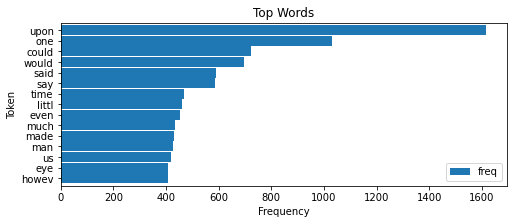

In [32]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(8,3))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [33]:
def lc(list):
    lcstory =[]
    for word in list:
        lcw = word.lower()
        lcstory.append(lcw) 
    return lcstory

In [34]:
poe_token_lowc = []
for story in poe_token_list:
    x = lc(story)
    poe_token_lowc.append(x)

In [35]:
#looking at the lowercase
freqdistvocab(poe_token_lowc)

<FreqDist with 24942 samples and 388836 outcomes>
(',', 29252)
('the', 24632)
('of', 14800)
('.', 12027)
('and', 9390)
('to', 7769)
('a', 7693)
('in', 6746)
('i', 5998)
('it', 3849)
('that', 3838)
('was', 3737)
('“', 2861)
('with', 2847)
('my', 2750)


In [36]:
from string import punctuation
punctuation=punctuation + '“’”‘'

In [37]:
poe_token_lcp =[]
for story in poe_token_lowc:
    x=[]
    for token in story:
        if token not in punctuation:
            x.append(token)
        else:
            continue
    poe_token_lcp.append(x)

In [38]:
#looking at the lowercase without punctuation
freqdistvocab(poe_token_lcp)

<FreqDist with 24921 samples and 332845 outcomes>
('the', 24632)
('of', 14800)
('and', 9390)
('to', 7769)
('a', 7693)
('in', 6746)
('i', 5998)
('it', 3849)
('that', 3838)
('was', 3737)
('with', 2847)
('my', 2750)
('is', 2690)
('as', 2605)
('at', 2573)


In [39]:
nltkstopwords = nltk.corpus.stopwords.words('english')

In [40]:
poe_token_lcp_stopped =[]
for story in poe_token_lcp:
    x=[]
    for token in story:
        if token not in nltkstopwords:
            x.append(token)
        else:
            continue
    poe_token_lcp_stopped.append(x)

In [41]:
#looking at the lowercase without punctuation, and stop words removed.
freqdistvocab(poe_token_lcp_stopped)

<FreqDist with 24772 samples and 160446 outcomes>
('upon', 1615)
('one', 1002)
('could', 724)
('would', 697)
('said', 591)
('say', 468)
('little', 460)
('much', 434)
('made', 430)
('man', 425)
('us', 419)
('however', 408)
('even', 400)
('great', 400)
('first', 390)


In [42]:
## Porter stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
poe_token_lcp_stopped_stemmed =[]
for story in poe_token_lcp_stopped:
    x=[]
    for token in story:
        y=ps.stem(token)
        x.append(y)
    poe_token_lcp_stopped_stemmed.append(x)

In [44]:
#looking at the lowercase without punctuation, and stop words removed. stemmed
freqdistvocab(poe_token_lcp_stopped_stemmed)

<FreqDist with 18041 samples and 160446 outcomes>
('upon', 1615)
('one', 1029)
('could', 724)
('would', 697)
('said', 591)
('say', 588)
('time', 469)
('littl', 462)
('even', 455)
('much', 434)
('made', 430)
('man', 425)
('us', 419)
('eye', 409)
('howev', 408)


In [45]:
#looking at the poe2
freqdistvocab(poe_for_vec2)

<FreqDist with 18059 samples and 160469 outcomes>
('upon', 1615)
('one', 1029)
('could', 724)
('would', 697)
('said', 591)
('say', 588)
('time', 469)
('littl', 462)
('even', 455)
('much', 434)
('made', 430)
('man', 425)
('us', 419)
('eye', 409)
('howev', 408)


In [46]:
#changing the list of tokens that are
#lowercase without punctuation, and stop words removed, and stemmed 
#to a list of strings instead of a list of lists.
poe_for_vec=[]
for story in poe_token_lcp_stopped_stemmed:
    x=' '.join(story)
    poe_for_vec.append(x)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
#setting the vectorizer to count the number of words, and min document frequncy of 5
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5)

In [49]:
#vectorizing using count
vecs = unigram_count_vectorizer.fit_transform(poe_for_vec)

In [50]:
#seeing the vector shape 1001 documents with 547 possible words
print(vecs.shape)
#displaying the first array
print(vecs[0].toarray())

(70, 3755)
[[0 0 0 ... 0 0 0]]


In [51]:
#creating a dataframe for visual inspection
pd.set_option('display.max_columns', None)
df=pd.DataFrame(vecs.toarray(),
            columns=unigram_count_vectorizer.get_feature_names_out())

In [52]:
label=poedf['classification'].to_list()

In [53]:
def unique(list):
    unique = []
    for x in list:
        if x not in unique:
            unique.append(x)
    return unique

In [54]:
unique(label)

['Adventure',
 'Parody',
 'Humor',
 'Adventure,Science_fiction',
 'Horror',
 'Romance',
 'Horror,Humor',
 'Sketch',
 'Satire',
 'Hoax,Science_fiction',
 'Science_fiction',
 'Horror,Satire',
 'Fantasy,Horror',
 'Humor,Satire',
 'Hoax,Horror,Science_fiction',
 'Fantasy',
 'Detective_fiction',
 'Horror,Ratiocination',
 'Detective_fiction,Satire',
 'Hoax,Satire',
 'Essay',
 'Fiction,Hoax']

In [55]:
label2=[]
for item in label:
    if item == 'Adventure':
        item = 0
    elif item == 'Adventure,Science_fiction':
        item = 5
    elif item == 'Parody':
        item = 1
    elif item == 'Humor':
        item = 1
    elif item == 'Satire':
        item = 1
    elif item == 'Detective_fiction,Satire':
        item = 7
    elif item == 'Hoax,Satire':
        item = 1
    elif item == 'Fantasy,Horror':
        item = 2    
    elif item == 'Humor,Satire':
        item = 1
    elif item == 'Horror':
        item = 2
    elif item == 'Horror,Ratiocination':
        item = 2
    elif item == 'Hoax,Horror,Science_fiction':
        item = 2
    elif item == 'Horror,Satire':
        item = 2
    elif item == 'Horror,Humor':
        item = 2
    elif item == 'Romance':
        item = 3
    elif item == 'Sketch':
        item = 4
    elif item == 'Hoax,Science_fiction':
        item = 5
    elif item == 'Science_fiction':
        item = 5
    elif item == 'Essay':
        item = 6
    elif item == 'Detective_fiction':
        item = 7
    elif item == 'Fantasy':
        item = 8
    elif item == 'Fiction,Hoax':
        item = 9
    else:
        item = item
    label2.append(item)
print(label2)

[0, 1, 1, 5, 2, 1, 3, 1, 2, 1, 2, 4, 2, 1, 1, 5, 5, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 5, 5, 1, 4, 1, 2, 2, 0, 2, 8, 4, 1, 2, 1, 2, 7, 2, 2, 2, 5, 2, 7, 1, 1, 1, 2, 1, 7, 1, 1, 1, 2, 6, 6, 6, 9, 7, 6, 5, 1]


In [56]:
#dataframe
df['labels']= label2
df

10  11  12  13  15  16  18  25  abandon  abey  abil  abl  abnorm  abomin  \
0    0   0   0   0   0   0   1   0        0     0     0    2       0       0   
1    0   0   0   0   0   0   0   0        2     0     0    1       0       0   
2    0   0   0   0   0   0   0   0        0     0     0    0       0       0   
3    0   0   0   0   0   0   0   0        0     0     0    1       1       0   
4    0   0   0   0   0   0   0   0        0     0     0    0       1       0   
..  ..  ..  ..  ..  ..  ..  ..  ..      ...   ...   ...  ...     ...     ...   
65   1   2   1   0   1   0   0   4        0     0     0    0       0       0   
66   1   1   1   1   1   1   4   1        1     0     3    2       1       0   
67   0   0   0   0   0   0   0   0        0     0     0    0       0       0   
68   1   0   0   0   0   0   1   1        1     0     1    8       0       0   
69   0   0   0   0   0   0   0   0        1     0     0    2       0       0   

    abound  about  abroad  abruptli  absenc  absent  absolut  absorb  \
0        0      0       0         0       0       0        1       5   
1        0      0       0         0       0       0        1       2   
2        0      0       0         0       0       0        0       0   
3        1      0       0         0       1       0        5       0   
4        0      0       0         0       0       0        1       2   
..     ...    ...     ...       ...     ...     ...      ...     ...   
65       0      0       0         0       1       0        3       1   
66       2      0       2         0      11       2        5       2   
67       0      0       0         0       0       0        3       0   
68       0      0       0         1       1       0        8       2   
69       0      0       0         0       0       0        0       1   

    abstract  abstrus  absurd  abund  abus  abyss  academi  accept  access  \
0          0        0       1      1     0      7        0       0       0   
1          0        0       0      0     0      0        0       0       0   
2          0        0       0      0     0      1        0       0       0   
3          0        0       0      0     0      1        0       0       1   
4          1        1       0      0     0      0        0       0       0   
..       ...      ...     ...    ...   ...    ...      ...     ...     ...   
65         0        0       0      1     0      0        0       0       0   
66         1        0       0      1     0      0        0       3       0   
67         0        0       3      0     0      0        0       0       0   
68         0        0       1      0     0      4        0       0       0   
69         0        0       0      0     0      0        0       0       0   

    accid  accident  accommod  accompani  accomplish  accord  accordingli  \
0       1         0         0          0           0       0            0   
1       1         1         0          0           0       1            1   
2       0         0         0          0           0       0            0   
3       3         0         0          0           1       0            0   
4       0         0         0          0           0       0            0   
..    ...       ...       ...        ...         ...     ...          ...   
65      2         1         0          2           6       0            0   
66      8         4         0          2           2       3            1   
67      0         0         0          0           2       1            0   
68      3         1         0          2          11       2            4   
69      0         0         0          0           0       0            0   

    accost  account  accumul  accur  accuraci  accurs  accus  accustom  \
0        0        8        0      1         0       0      0         0   
1        0        3        0      0         0       1      0         0   
2        0        0        0      0         0       1      1         0   
3        1        2 